# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

# 1. Read Data
    

In [2]:
import pandas as pd

# Read the CSV files
train_df = pd.read_csv('data/diamonds-train.csv')
test_df = pd.read_csv('data/diamonds-test.csv')

# Display the first few rows of each DataFrame
print("Training Data:")
display(train_df.head())
print("Test Data:")
display(test_df.head())



Training Data:


,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.53,Very Good,D,VS2,63.2,56.0,5.10,5.15,3.24,1601
1,2,0.32,Premium,H,VS2,62.4,58.0,4.36,4.33,2.71,648
2,3,0.76,Ideal,I,SI1,61.8,57.0,5.89,5.83,3.62,2399
3,4,1.01,Good,H,VS2,60.8,61.0,6.43,6.50,3.93,5229
4,5,0.73,Ideal,I,VS1,62.1,54.0,5.77,5.80,3.59,2167


Test Data:


,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,44001,1.09,Ideal,G,VVS2,62.5,56.0,6.54,6.58,4.10,8282
1,44002,0.70,Very Good,F,SI1,59.8,60.0,5.75,5.83,3.46,2196
2,44003,2.01,Good,I,SI1,58.8,60.0,8.27,8.19,4.84,16731
3,44004,0.27,Ideal,F,IF,61.8,55.0,4.14,4.21,2.57,760
4,44005,0.54,Premium,D,SI1,62.3,60.0,5.22,5.18,3.24,1715


## 2. Pre processament

### Detectar outliers a partir de la distribucio

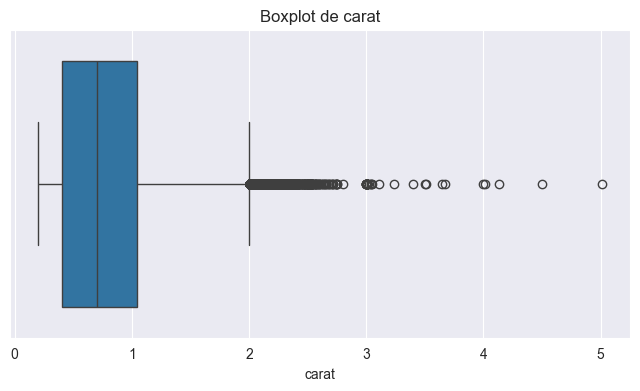

carat - Nombre d'outliers: 1536


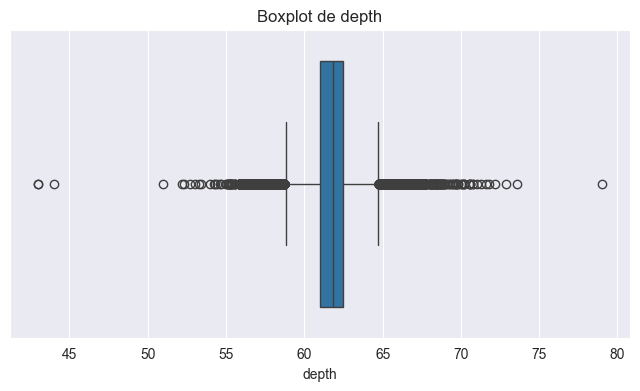

depth - Nombre d'outliers: 2063


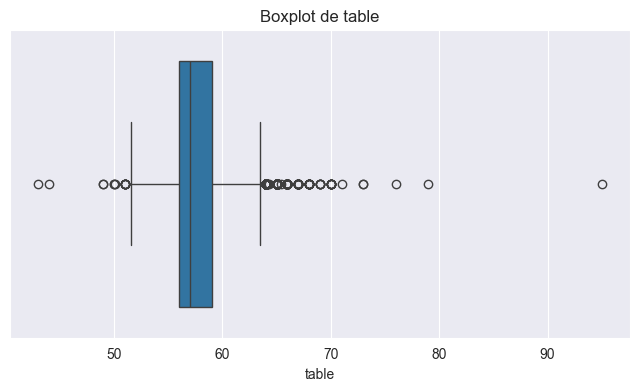

table - Nombre d'outliers: 490


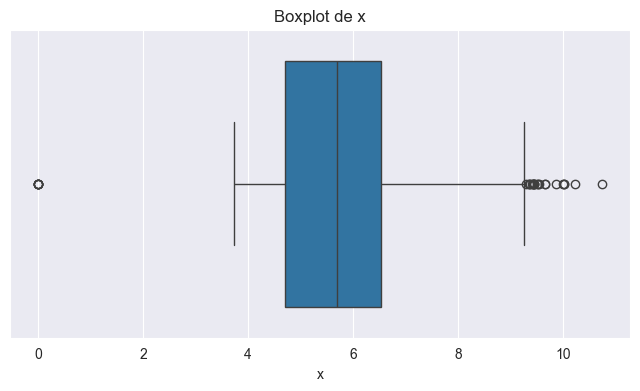

x - Nombre d'outliers: 27


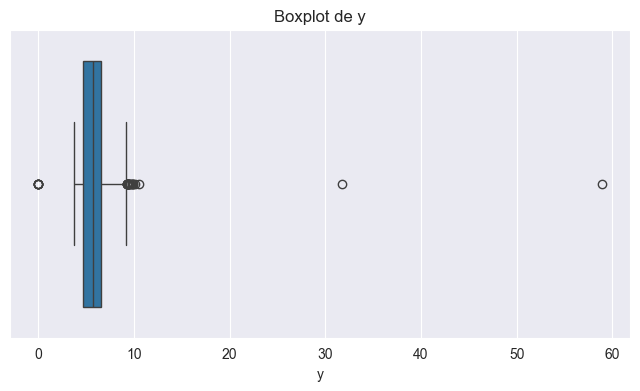

y - Nombre d'outliers: 28


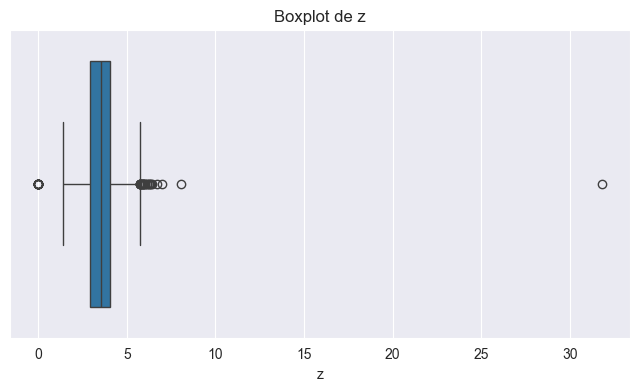

z - Nombre d'outliers: 41


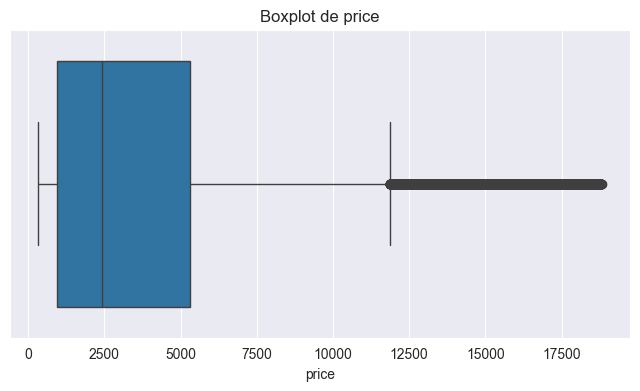

price - Nombre d'outliers: 2907


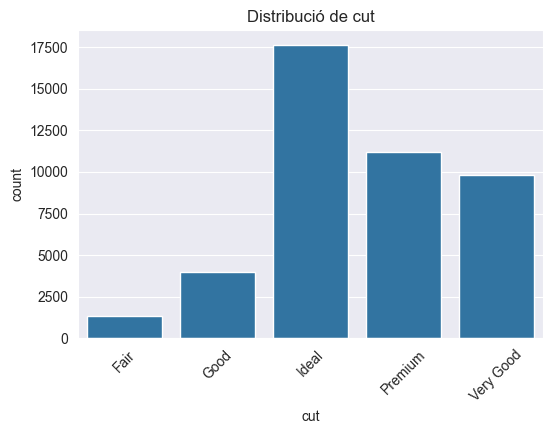

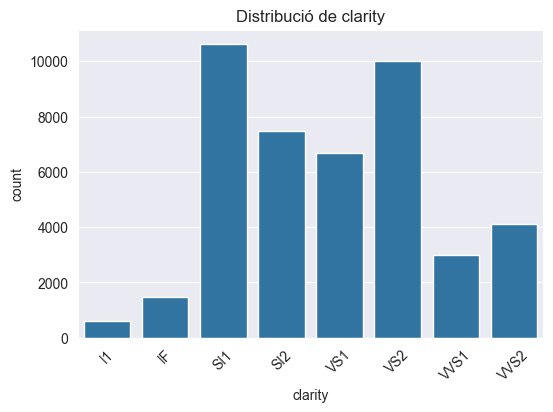

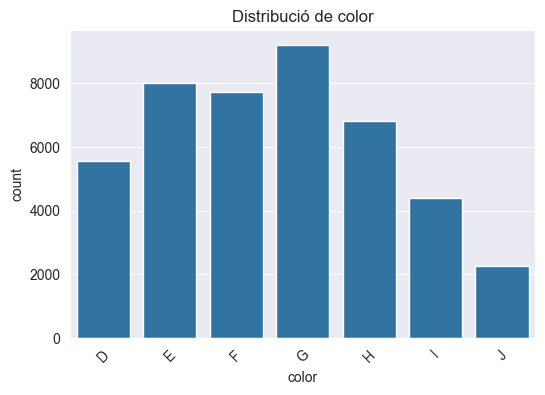

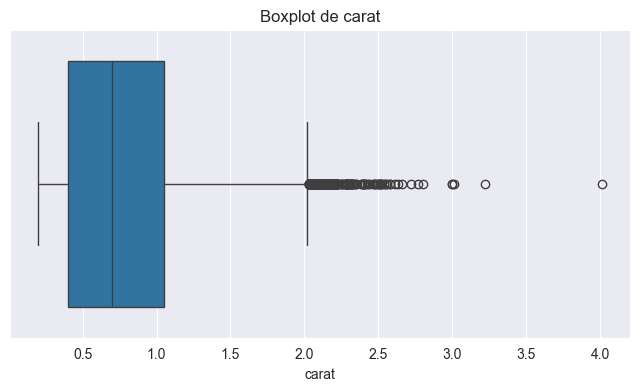

carat - Nombre d'outliers: 245


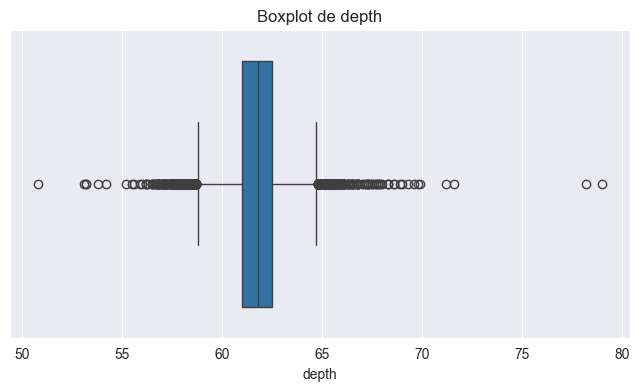

depth - Nombre d'outliers: 482


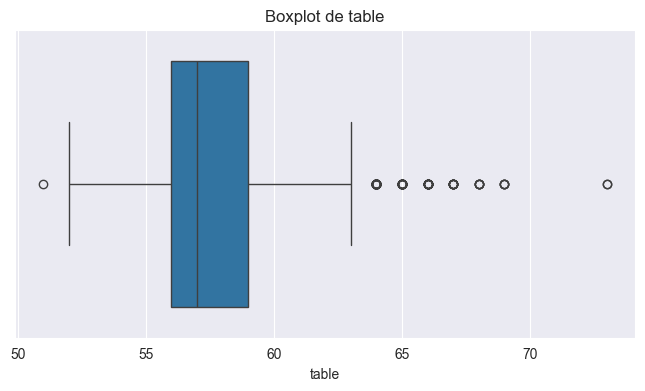

table - Nombre d'outliers: 115


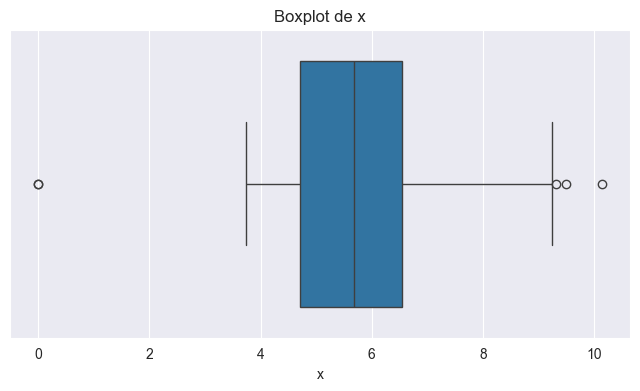

x - Nombre d'outliers: 5


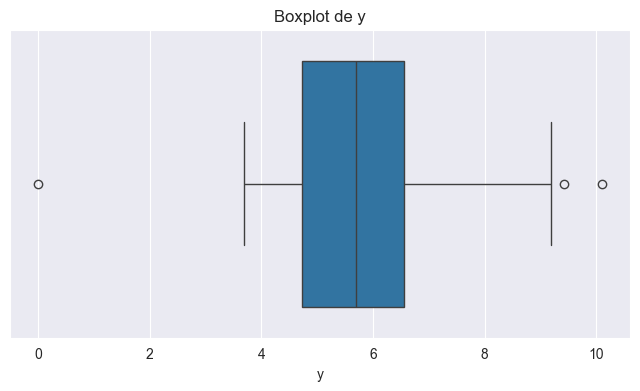

y - Nombre d'outliers: 3


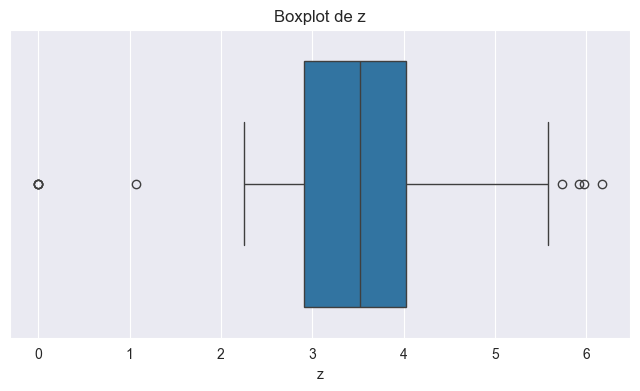

z - Nombre d'outliers: 9


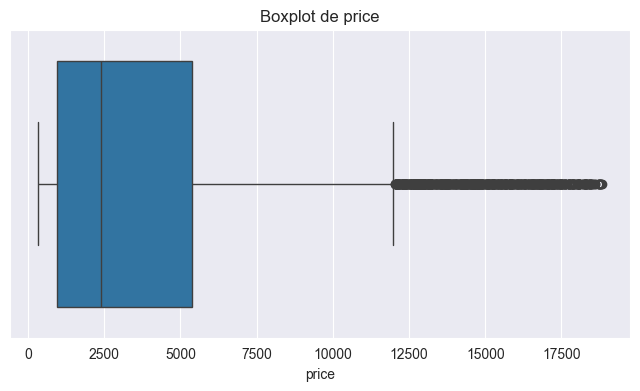

price - Nombre d'outliers: 640


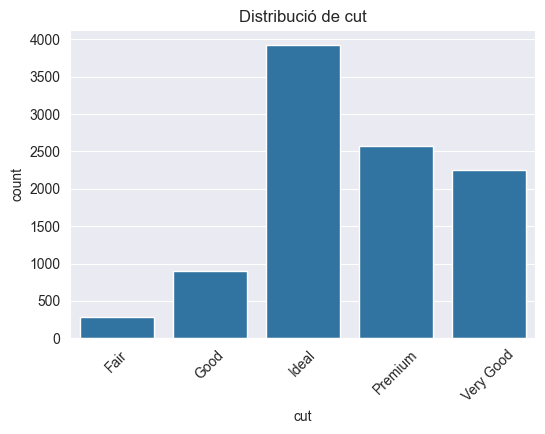

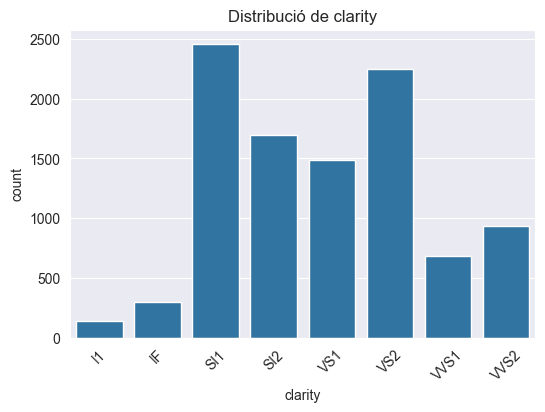

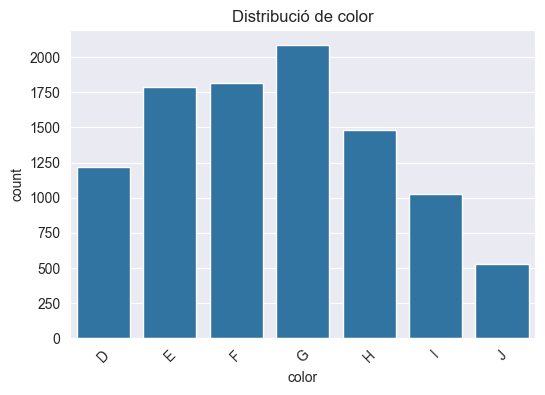

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

def analitzar_outliers_i_distribucions(df, atributs_numerics=None, atributs_categorics=None):
    if atributs_numerics is None:
        atributs_numerics = ['carat', 'depth', 'table', 'x', 'y', 'z', 'price']
    if atributs_categorics is None:
        atributs_categorics = ['cut', 'clarity', 'color']

    def detectar_outliers_iqr(dataframe, columna):
        Q1 = dataframe[columna].quantile(0.25)
        Q3 = dataframe[columna].quantile(0.75)
        IQR = Q3 - Q1
        outliers = dataframe[(dataframe[columna] < Q1 - 1.5 * IQR) | (dataframe[columna] > Q3 + 1.5 * IQR)]
        return outliers

    # Gràfics i detecció d'outliers per atributs numèrics
    for atribut in atributs_numerics:
        plt.figure(figsize=(8, 4))
        sns.boxplot(data=df, x=atribut)
        plt.title(f'Boxplot de {atribut}')
        plt.show()

        outliers = detectar_outliers_iqr(df, atribut)
        print(f'{atribut} - Nombre d\'outliers: {len(outliers)}')

    # Distribució per atributs categòrics
    for col in atributs_categorics:
        plt.figure(figsize=(6, 4))
        sns.countplot(data=df, x=col, order=sorted(df[col].unique()))
        plt.title(f'Distribució de {col}')
        plt.xticks(rotation=45)
        plt.show()

analitzar_outliers_i_distribucions(train_df)
analitzar_outliers_i_distribucions(test_df)


### Posar en un taula els outliers


In [13]:
import pandas as pd

def obtenir_outliers_iqr(df, atributs_numerics=None):
    if atributs_numerics is None:
        atributs_numerics = ['carat', 'depth', 'table', 'x', 'y', 'z', 'price']
    
    def detectar_outliers_iqr(df, columna):
        Q1 = df[columna].quantile(0.25)
        Q3 = df[columna].quantile(0.75)
        IQR = Q3 - Q1
        return df[(df[columna] < Q1 - 1.5 * IQR) | (df[columna] > Q3 + 1.5 * IQR)]

    outliers_df = pd.DataFrame()

    for atribut in atributs_numerics:
        outliers = detectar_outliers_iqr(df, atribut)

        if not outliers.empty:
            outliers = outliers.copy()
            outliers['atribut_outlier'] = atribut
            outliers['id'] = outliers.index

            outliers_df = pd.concat([outliers_df, outliers[['id', atribut, 'atribut_outlier']]])

    outliers_df.reset_index(drop=True, inplace=True)
    return outliers_df

outliers_df = obtenir_outliers_iqr(train_df)
outliers_test_df = obtenir_outliers_iqr(test_df)

### Identificar outliers a partir de scatter plots atributs/preu


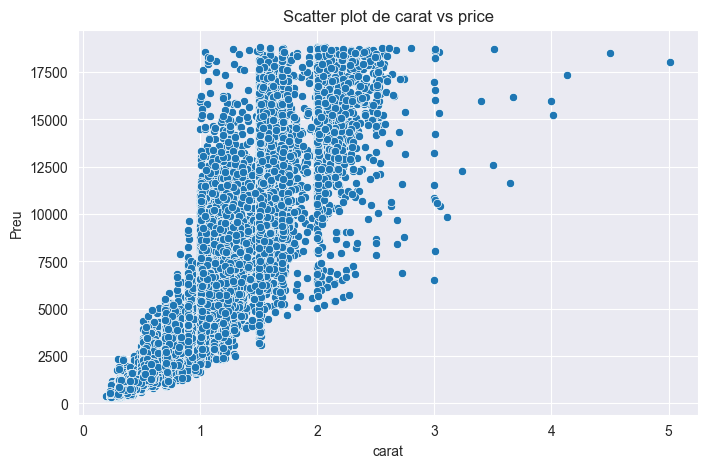

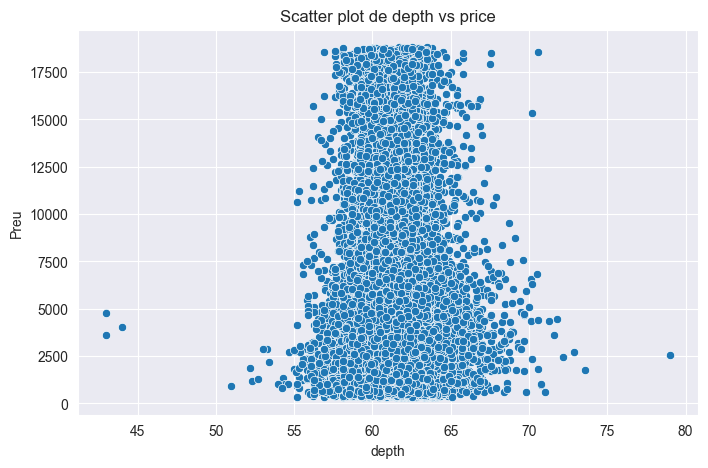

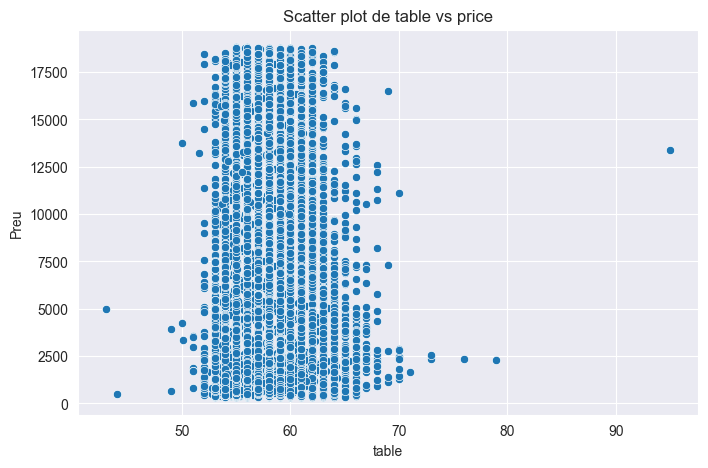

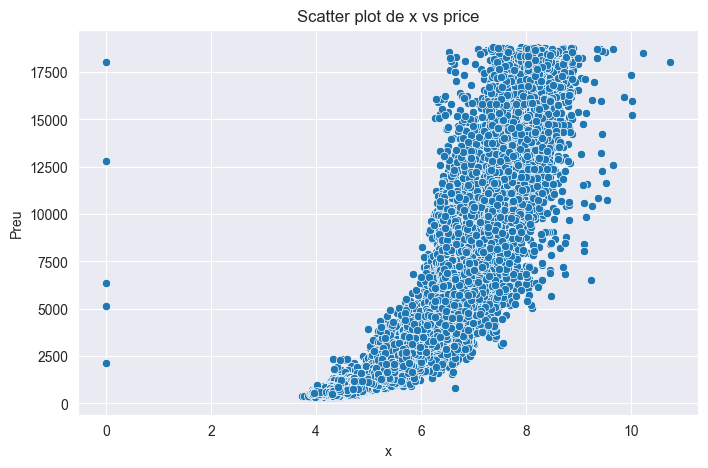

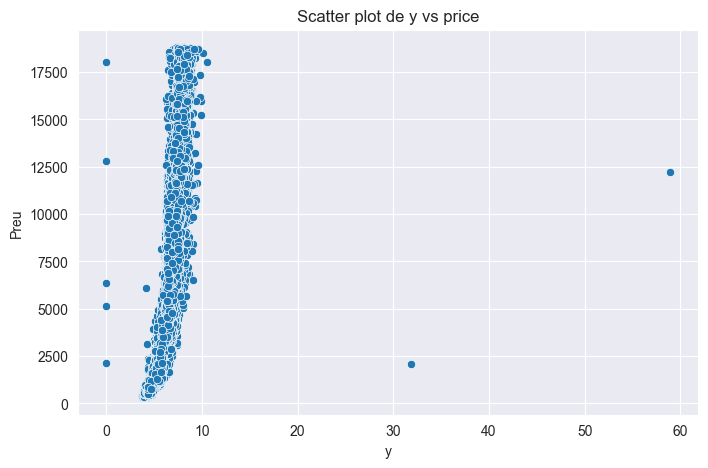

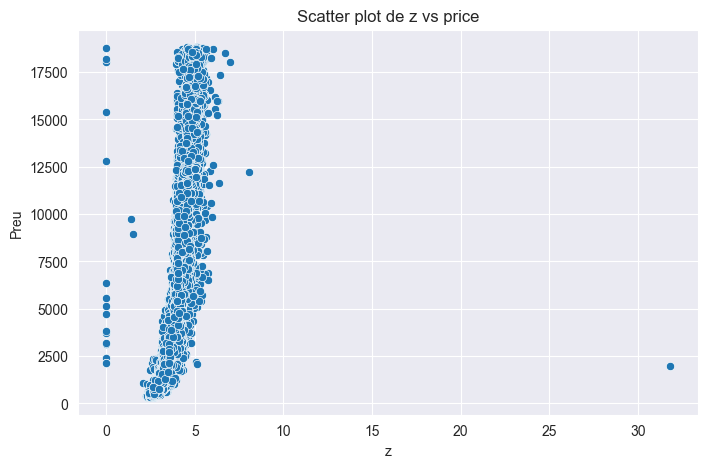

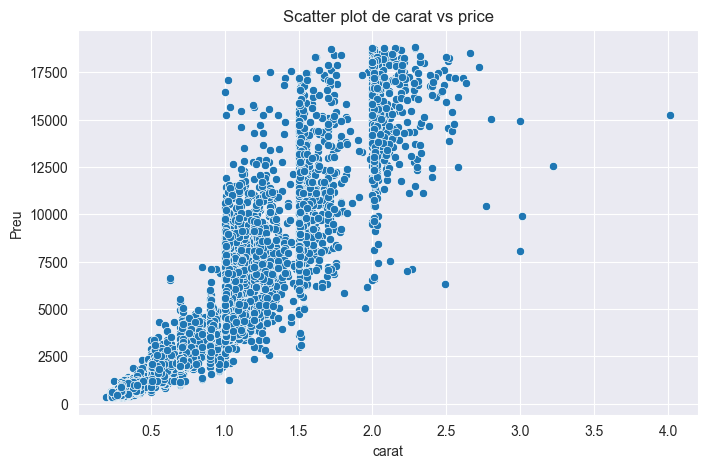

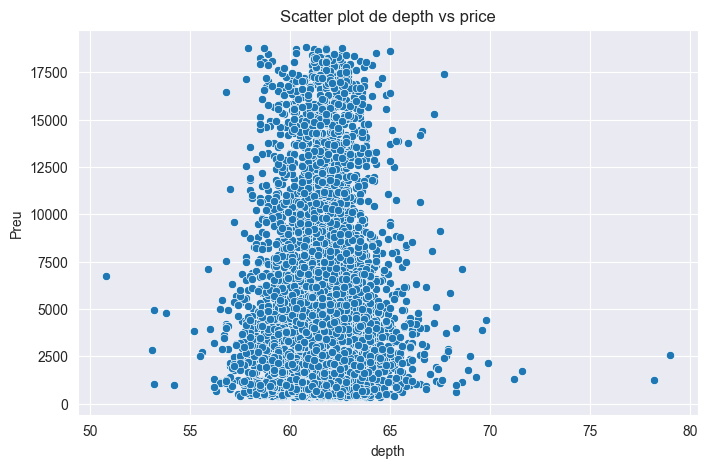

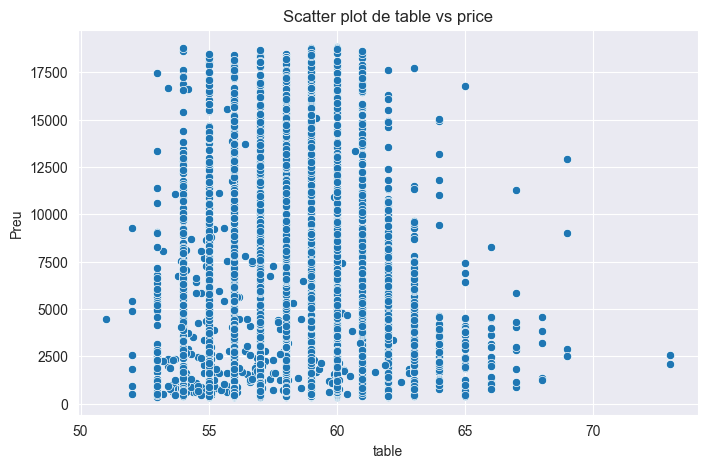

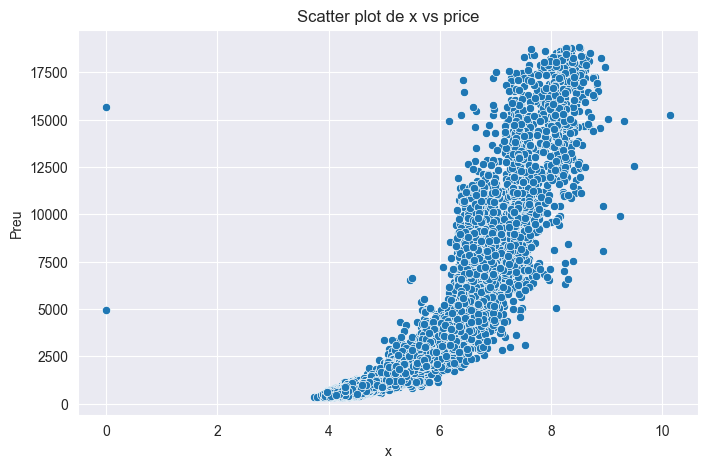

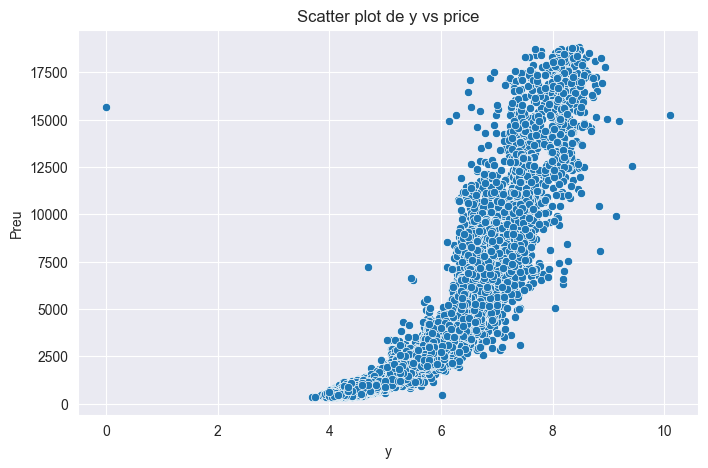

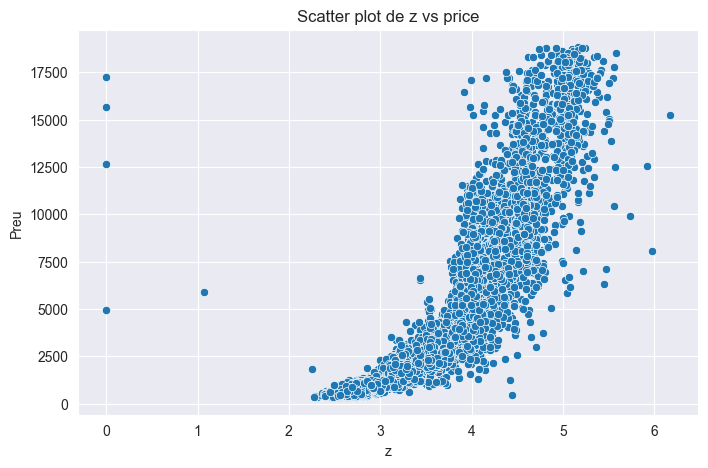

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Atributs numèrics que volem comparar amb el preu
atributs = ['carat', 'depth', 'table', 'x', 'y', 'z']

# Dibuixar scatter plots atribut vs preu
for atribut in atributs:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=train_df, x=atribut, y='price')
    plt.title(f'Scatter plot de {atribut} vs price')
    plt.xlabel(atribut)
    plt.ylabel('Preu')
    plt.grid(True)
    plt.show()



# Dibuixar scatter plots atribut vs preu
for atribut in atributs:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=test_df, x=atribut, y='price')
    plt.title(f'Scatter plot de {atribut} vs price')
    plt.xlabel(atribut)
    plt.ylabel('Preu')
    plt.grid(True)
    plt.show()


### Taula amb els outliers de preu 


In [15]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

def detectar_anomalies_regressio(df, atributs_numerics=None):
    if atributs_numerics is None:
        atributs_numerics = ['carat', 'depth', 'table', 'x', 'y', 'z']
    
    df = df.copy()
    df['id'] = df.index  # Assegurem que existeix una columna id
    anomalies = []

    for atribut in atributs_numerics:
        X = df[[atribut]]
        y = df['price']
        model = LinearRegression().fit(X, y)
        preds = model.predict(X)

        residus = y - preds
        Q1 = np.percentile(residus, 25)
        Q3 = np.percentile(residus, 75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        is_outlier = (residus < lower_bound) | (residus > upper_bound)

        for idx in df[is_outlier].index:
            anomalies.append((idx, atribut))

    anom_df = pd.DataFrame(anomalies, columns=['id', 'atribut_anomal'])
    result = df.merge(anom_df, on='id', how='inner')

    cols = ['id'] + atributs_numerics + ['price', 'atribut_anomal']
    result = result[cols]

    return result

anomalies_train = detectar_anomalies_regressio(train_df)
anomalies_test = detectar_anomalies_regressio(test_df)

print("Train - files amb anomalies:", len(anomalies_train['id'].unique()))
print("Test  - files amb anomalies:", len(anomalies_test['id'].unique()))

display(anomalies_train.head())
display(anomalies_test.head())



Train - files amb anomalies: 4659
Test  - files amb anomalies: 1020


,id,carat,depth,table,x,y,z,price,atribut_anomal
0,9,1.8,61.4,54.0,7.86,7.82,4.81,16340,carat
1,9,1.8,61.4,54.0,7.86,7.82,4.81,16340,depth
2,9,1.8,61.4,54.0,7.86,7.82,4.81,16340,table
3,9,1.8,61.4,54.0,7.86,7.82,4.81,16340,x
4,9,1.8,61.4,54.0,7.86,7.82,4.81,16340,y


,id,carat,depth,table,x,y,z,price,atribut_anomal
0,2,2.01,58.8,60.0,8.27,8.19,4.84,16731,carat
1,2,2.01,58.8,60.0,8.27,8.19,4.84,16731,depth
2,2,2.01,58.8,60.0,8.27,8.19,4.84,16731,table
3,2,2.01,58.8,60.0,8.27,8.19,4.84,16731,x
4,2,2.01,58.8,60.0,8.27,8.19,4.84,16731,y


### Descriminar outliers
Deixarem de banda tots les files que estiguin presents +1 d'un cop en qualsevol dels dos dataframes d'outliers

In [16]:
import pandas as pd

def ids_repetits(result_df, outliers_df):
    # Combinar les columnes 'id' de tots dos DataFrames
    combined_ids = pd.concat([result_df['id'], outliers_df['id']])
    
    # Comptar la freqüència de cada ID
    id_counts = combined_ids.value_counts()
    
    # Filtrar aquells que apareixen més d'una vegada
    ids_more_than_once = id_counts[id_counts > 1]
    
    return ids_more_than_once

ids_more_than_once_train = ids_repetits(anomalies_train, outliers_df)
ids_more_than_once_test = ids_repetits(anomalies_test, outliers_test_df)



In [17]:
def filtrar_ids_repetits(df, ids_repetits):
    """
    Elimina del DataFrame totes les files amb IDs presents a `ids_repetits`.

    Args:
        df (pd.DataFrame): El DataFrame original (ha de tenir una columna 'id').
        ids_repetits (pd.Series or list or Index): Els IDs que s'han de filtrar (com els retornats per value_counts()).

    Returns:
        pd.DataFrame: El DataFrame filtrat sense els IDs indicats.
    """
    df_filtrat = df[~df['id'].isin(ids_repetits.index if isinstance(ids_repetits, pd.Series) else ids_repetits)]
    return df_filtrat
train_without_outliers_df = filtrar_ids_repetits(train_df, ids_more_than_once_train)
test_without_outliers_df = filtrar_ids_repetits(test_df, ids_more_than_once_test)
display(train_without_outliers_df)
display(test_without_outliers_df)


,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.53,Very Good,D,VS2,63.2,56.0,5.10,5.15,3.24,1601
1,2,0.32,Premium,H,VS2,62.4,58.0,4.36,4.33,2.71,648
2,3,0.76,Ideal,I,SI1,61.8,57.0,5.89,5.83,3.62,2399
3,4,1.01,Good,H,VS2,60.8,61.0,6.43,6.50,3.93,5229
4,5,0.73,Ideal,I,VS1,62.1,54.0,5.77,5.80,3.59,2167
...,...,...,...,...,...,...,...,...,...,...,...
43994,43995,0.33,Premium,I,VVS2,61.0,59.0,4.44,4.41,2.70,743
43995,43996,0.91,Very Good,G,VS1,60.9,54.0,6.27,6.38,3.85,4590
43996,43997,0.31,Premium,D,VS1,59.6,58.0,4.41,4.38,2.62,877
43998,43999,1.51,Premium,F,VS2,62.0,62.0,7.35,7.23,4.52,13771


,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,44001,1.09,Ideal,G,VVS2,62.5,56.0,6.54,6.58,4.10,8282
1,44002,0.70,Very Good,F,SI1,59.8,60.0,5.75,5.83,3.46,2196
2,44003,2.01,Good,I,SI1,58.8,60.0,8.27,8.19,4.84,16731
3,44004,0.27,Ideal,F,IF,61.8,55.0,4.14,4.21,2.57,760
4,44005,0.54,Premium,D,SI1,62.3,60.0,5.22,5.18,3.24,1715
...,...,...,...,...,...,...,...,...,...,...,...
9935,53936,2.63,Ideal,J,SI2,62.1,57.0,8.83,8.88,5.50,16914
9936,53937,1.10,Ideal,F,VVS2,61.2,56.0,6.68,6.65,4.08,9817
9937,53938,2.25,Ideal,I,SI2,60.7,56.0,8.54,8.50,5.17,11104
9938,53939,1.02,Very Good,E,IF,63.5,58.0,6.43,6.33,4.05,10710


### Posar categories numeros
Utilitzarem un ordre de pitjor a dolent amb un mapeig


In [18]:
import pandas as pd

def convertir_categories_a_numerics(df):
    """
    Converteix les columnes categòriques 'cut', 'color' i 'clarity' a valors numèrics segons un mapping predefinit.

    Args:
        df (pd.DataFrame): DataFrame amb les columnes categòriques a convertir.

    Returns:
        pd.DataFrame: Nou DataFrame amb les categories convertides a valors numèrics.
    """
    without_outliers_no_categories_df = df.copy()

    cut_mapping = {
        'Fair': 0,
        'Good': 1,
        'Very Good': 2,
        'Premium': 3,
        'Ideal': 4
    }

    color_mapping = {
        'D': 0, 'E': 1, 'F': 2,
        'G': 3, 'H': 4, 'I': 5, 'J': 6
    }

    clarity_mapping = {
        'I1': 0, 'SI2': 1, 'SI1': 2, 'VS2': 3, 'VS1': 4,
        'VVS2': 5, 'VVS1': 6, 'IF': 7
    }

    without_outliers_no_categories_df['cut'] = without_outliers_no_categories_df['cut'].replace(cut_mapping)
    without_outliers_no_categories_df['color'] = without_outliers_no_categories_df['color'].replace(color_mapping)
    without_outliers_no_categories_df['clarity'] = without_outliers_no_categories_df['clarity'].replace(clarity_mapping)

    return without_outliers_no_categories_df

train_without_outliers_no_categories_df = convertir_categories_a_numerics(train_without_outliers_df)
test_without_outliers_no_categories_df = convertir_categories_a_numerics(test_without_outliers_df)
display(train_without_outliers_no_categories_df.head())
display(test_without_outliers_no_categories_df.head())


C:\Users\pc\AppData\Local\Temp\ipykernel_26292\2425583159.py:33: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  without_outliers_no_categories_df['cut'] = without_outliers_no_categories_df['cut'].replace(cut_mapping)
C:\Users\pc\AppData\Local\Temp\ipykernel_26292\2425583159.py:34: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  without_outliers_no_categories_df['color'] = without_outliers_no_categories_df['color'].replace(color_mapping)
C:\Users\pc\AppData\Local\Temp\ipykernel_26292\2425583159.py:35: FutureWarning: Downcasting behavi

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.53,2,0,3,63.2,56.0,5.10,5.15,3.24,1601
1,2,0.32,3,4,3,62.4,58.0,4.36,4.33,2.71,648
2,3,0.76,4,5,2,61.8,57.0,5.89,5.83,3.62,2399
3,4,1.01,1,4,3,60.8,61.0,6.43,6.50,3.93,5229
4,5,0.73,4,5,4,62.1,54.0,5.77,5.80,3.59,2167


,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,44001,1.09,4,3,5,62.5,56.0,6.54,6.58,4.10,8282
1,44002,0.70,2,2,2,59.8,60.0,5.75,5.83,3.46,2196
2,44003,2.01,1,5,2,58.8,60.0,8.27,8.19,4.84,16731
3,44004,0.27,4,2,7,61.8,55.0,4.14,4.21,2.57,760
4,44005,0.54,3,0,2,62.3,60.0,5.22,5.18,3.24,1715


### Estandaritzar carat, depth, table


In [19]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

def estandarditzar_columnes(df, columnes_a_estandaritzar=None):
    """
    Estandarditza les columnes especificades d’un DataFrame utilitzant StandardScaler.

    Args:
        df (pd.DataFrame): El DataFrame d'entrada.
        columnes_a_estandaritzar (list, opcional): Llista de columnes a estandarditzar. Per defecte: ['carat', 'depth', 'table'].

    Returns:
        pd.DataFrame: Un nou DataFrame amb les columnes especificades estandarditzades.
    """
    if columnes_a_estandaritzar is None:
        columnes_a_estandaritzar = ['carat', 'depth', 'table']
    
    df_estandarditzat = df.copy()
    scaler = StandardScaler()
    df_estandarditzat[columnes_a_estandaritzar] = scaler.fit_transform(df_estandarditzat[columnes_a_estandaritzar])

    return df_estandarditzat

train_without_outliers_no_categories_estandaritzar_df = estandarditzar_columnes(train_without_outliers_no_categories_df)
test_without_outliers_no_categories_estandaritzar_df = estandarditzar_columnes(test_without_outliers_no_categories_df)
# Ver el DataFrame estandarizado
display(train_without_outliers_no_categories_estandaritzar_df.head())
display(test_without_outliers_no_categories_estandaritzar_df.head())


,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,-0.565086,2,0,3,1.014770,-0.649377,5.10,5.15,3.24,1601
1,2,-1.009085,3,4,3,0.454542,0.247430,4.36,4.33,2.71,648
2,3,-0.078801,4,5,2,0.034371,-0.200974,5.89,5.83,3.62,2399
3,4,0.449770,1,4,3,-0.665913,1.592640,6.43,6.50,3.93,5229
4,5,-0.142229,4,5,4,0.244457,-1.546184,5.77,5.80,3.59,2167


,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,44001,0.613826,4,3,5,0.525502,-0.664813,6.54,6.58,4.10,8282
1,44002,-0.206341,2,2,2,-1.347338,1.118980,5.75,5.83,3.46,2196
2,44003,2.548580,1,5,2,-2.040982,1.118980,8.27,8.19,4.84,16731
3,44004,-1.110628,4,2,7,0.039951,-1.110761,4.14,4.21,2.57,760
4,44005,-0.542820,3,0,2,0.386773,1.118980,5.22,5.18,3.24,1715


### Estandaritzar x, y, z

In [20]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

def normalitzar_xyz_minmax(df, columnes_a_normalitzar=None, rang=(-1, 1)):
    """
    Aplica MinMaxScaler a les columnes 'x', 'y', 'z' dins d’un rang donat (per defecte [-1, 1]).

    Args:
        df (pd.DataFrame): DataFrame d’entrada amb les columnes a normalitzar.
        columnes_a_normalitzar (list, optional): Columnes a normalitzar. Per defecte: ['x', 'y', 'z'].
        rang (tuple, optional): Rang pel MinMaxScaler. Per defecte: (-1, 1).

    Returns:
        pd.DataFrame: Nou DataFrame amb les columnes normalitzades.
    """
    if columnes_a_normalitzar is None:
        columnes_a_normalitzar = ['x', 'y', 'z']
    
    df_normalitzat = df.copy()
    scaler = MinMaxScaler(feature_range=rang)
    df_normalitzat[columnes_a_normalitzar] = scaler.fit_transform(df_normalitzat[columnes_a_normalitzar])
    
    return df_normalitzat

train_without_outliers_no_categories_estandaritzar_xyz_df = normalitzar_xyz_minmax(train_without_outliers_no_categories_df)
test_without_outliers_no_categories_estandaritzar_xyz_df = normalitzar_xyz_minmax(test_without_outliers_no_categories_df)
display(test_without_outliers_no_categories_estandaritzar_xyz_df.head())
display(train_without_outliers_no_categories_estandaritzar_xyz_df.head())



,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,44001,1.09,4,3,5,62.5,56.0,0.289941,0.302970,0.329011,8282
1,44002,0.70,2,2,2,59.8,60.0,0.134122,0.154455,0.121556,2196
2,44003,2.01,1,5,2,58.8,60.0,0.631164,0.621782,0.568882,16731
3,44004,0.27,4,2,7,61.8,55.0,-0.183432,-0.166337,-0.166937,760
4,44005,0.54,3,0,2,62.3,60.0,0.029586,0.025743,0.050243,1715


,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.53,2,0,3,63.2,56.0,-0.050279,-0.825127,-0.796226,1601
1,2,0.32,3,4,3,62.4,58.0,-0.188082,-0.852971,-0.829560,648
2,3,0.76,4,5,2,61.8,57.0,0.096834,-0.802037,-0.772327,2399
3,4,1.01,1,4,3,60.8,61.0,0.197393,-0.779287,-0.752830,5229
4,5,0.73,4,5,4,62.1,54.0,0.074488,-0.803056,-0.774214,2167


### Estandaritzar preus

In [21]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

def afegir_log_price_escalat(df, columna_preu='price', nou_nom='log_price', rang=(0.1, 0.9)):
    """
    Afegeix una columna logarítmica del preu i l’escalada dins d’un rang especificat.

    Args:
        df (pd.DataFrame): DataFrame original amb la columna de preus.
        columna_preu (str): Nom de la columna amb el preu original. Per defecte: 'price'.
        nou_nom (str): Nom de la nova columna. Per defecte: 'log_price'.
        rang (tuple): Rang per al MinMaxScaler. Per defecte: (0.1, 0.9).

    Returns:
        pd.DataFrame: Nou DataFrame amb la columna 'log_price' normalitzada.
    """
    df_log_escalat = df.copy()
    df_log_escalat[nou_nom] = np.log(df_log_escalat[columna_preu])
    
    scaler = MinMaxScaler(feature_range=rang)
    df_log_escalat[nou_nom] = scaler.fit_transform(df_log_escalat[[nou_nom]])

    return df_log_escalat
df_log_escalat_train = afegir_log_price_escalat(train_without_outliers_no_categories_estandaritzar_xyz_df)
df_log_escalat_test = afegir_log_price_escalat(test_without_outliers_no_categories_estandaritzar_xyz_df)
display(df_log_escalat_test.head())
display(df_log_escalat_train.head())


,id,carat,cut,color,clarity,depth,table,x,y,z,price,log_price
0,44001,1.09,4,3,5,62.5,56.0,0.289941,0.302970,0.329011,8282,0.737092
1,44002,0.70,2,2,2,59.8,60.0,0.134122,0.154455,0.121556,2196,0.473689
2,44003,2.01,1,5,2,58.8,60.0,0.631164,0.621782,0.568882,16731,0.876622
3,44004,0.27,4,2,7,61.8,55.0,-0.183432,-0.166337,-0.166937,760,0.263143
4,44005,0.54,3,0,2,62.3,60.0,0.029586,0.025743,0.050243,1715,0.424633


,id,carat,cut,color,clarity,depth,table,x,y,z,price,log_price
0,1,0.53,2,0,3,63.2,56.0,-0.050279,-0.825127,-0.796226,1601,0.413928
1,2,0.32,3,4,3,62.4,58.0,-0.188082,-0.852971,-0.829560,648,0.235513
2,3,0.76,4,5,2,61.8,57.0,0.096834,-0.802037,-0.772327,2399,0.493702
3,4,1.01,1,4,3,60.8,61.0,0.197393,-0.779287,-0.752830,5229,0.647397
4,5,0.73,4,5,4,62.1,54.0,0.074488,-0.803056,-0.774214,2167,0.473640


### Crear High_Price

In [22]:
import numpy as np
import pandas as pd

def afegir_columna_high_price(df, columna_preu='price', nou_nom='high_price', llindar=2500):
    """
    Afegeix una columna binària 'high_price' basada en si el preu supera un llindar.

    Args:
        df (pd.DataFrame): DataFrame original amb la columna de preu.
        columna_preu (str): Nom de la columna amb el preu. Per defecte: 'price'.
        nou_nom (str): Nom de la nova columna. Per defecte: 'high_price'.
        llindar (int or float): Valor a partir del qual es considera preu alt. Per defecte: 2500.

    Returns:
        pd.DataFrame: Nou DataFrame amb la columna binària afegida.
    """
    df_high_price = df.copy()
    df_high_price[nou_nom] = np.where(df_high_price[columna_preu] >= llindar, 1, 0)
    return df_high_price
df_high_price_train = afegir_columna_high_price(df_log_escalat_train)
df_high_price_test = afegir_columna_high_price(df_log_escalat_test)
display(df_high_price_test.head())
display(df_high_price_train.head())


,id,carat,cut,color,clarity,depth,table,x,y,z,price,log_price,high_price
0,44001,1.09,4,3,5,62.5,56.0,0.289941,0.302970,0.329011,8282,0.737092,1
1,44002,0.70,2,2,2,59.8,60.0,0.134122,0.154455,0.121556,2196,0.473689,0
2,44003,2.01,1,5,2,58.8,60.0,0.631164,0.621782,0.568882,16731,0.876622,1
3,44004,0.27,4,2,7,61.8,55.0,-0.183432,-0.166337,-0.166937,760,0.263143,0
4,44005,0.54,3,0,2,62.3,60.0,0.029586,0.025743,0.050243,1715,0.424633,0


,id,carat,cut,color,clarity,depth,table,x,y,z,price,log_price,high_price
0,1,0.53,2,0,3,63.2,56.0,-0.050279,-0.825127,-0.796226,1601,0.413928,0
1,2,0.32,3,4,3,62.4,58.0,-0.188082,-0.852971,-0.829560,648,0.235513,0
2,3,0.76,4,5,2,61.8,57.0,0.096834,-0.802037,-0.772327,2399,0.493702,0
3,4,1.01,1,4,3,60.8,61.0,0.197393,-0.779287,-0.752830,5229,0.647397,1
4,5,0.73,4,5,4,62.1,54.0,0.074488,-0.803056,-0.774214,2167,0.473640,0


### Drop categoria ID


In [28]:
# Eliminar la columna 'id' (o la columna de categoria que s'anomeni de forma similar)
test_processed_df = df_high_price_test.drop(columns=['id'])
train_processed_df = df_high_price_train.drop(columns=['id'])

# Visualitzar el DataFrame per verificar que la columna ha estat eliminada
display(test_processed_df)
display(train_processed_df.head())


,carat,cut,color,clarity,depth,table,x,y,z,price,log_price,high_price
0,1.09,4,3,5,62.5,56.0,0.289941,0.302970,0.329011,8282,0.737092,1
1,0.70,2,2,2,59.8,60.0,0.134122,0.154455,0.121556,2196,0.473689,0
2,2.01,1,5,2,58.8,60.0,0.631164,0.621782,0.568882,16731,0.876622,1
3,0.27,4,2,7,61.8,55.0,-0.183432,-0.166337,-0.166937,760,0.263143,0
4,0.54,3,0,2,62.3,60.0,0.029586,0.025743,0.050243,1715,0.424633,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9935,2.63,4,6,1,62.1,57.0,0.741617,0.758416,0.782820,16914,0.878781,1
9936,1.10,4,2,5,61.2,56.0,0.317554,0.316832,0.322528,9817,0.770831,1
9937,2.25,4,5,1,60.7,56.0,0.684418,0.683168,0.675851,11104,0.795275,1
9938,1.02,2,1,7,63.5,58.0,0.268245,0.253465,0.312804,10710,0.788106,1


,carat,cut,color,clarity,depth,table,x,y,z,price,log_price,high_price
0,0.53,2,0,3,63.2,56.0,-0.050279,-0.825127,-0.796226,1601,0.413928,0
1,0.32,3,4,3,62.4,58.0,-0.188082,-0.852971,-0.829560,648,0.235513,0
2,0.76,4,5,2,61.8,57.0,0.096834,-0.802037,-0.772327,2399,0.493702,0
3,1.01,1,4,3,60.8,61.0,0.197393,-0.779287,-0.752830,5229,0.647397,1
4,0.73,4,5,4,62.1,54.0,0.074488,-0.803056,-0.774214,2167,0.473640,0


# PREDICCIÓ DEL PREU
### 


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

print("Loading data...")

# Define features and target variable
X = train_processed_df[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']]
y = train_processed_df['log_price']

print("Splitting data into training and testing sets...", flush=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Defining models and hyperparameters...", flush=True)

# Define the models and their hyperparameters for cross-validation
models = {
    'MLR': LinearRegression(),
    'k-NN': KNeighborsRegressor(),
    'MLNN-BP': MLPRegressor(max_iter=1000)
}

param_grids = {
    'MLR': {
        'model__fit_intercept': [True, False],
        'model__n_jobs': [None, -1, 1, 2],
    },
    'k-NN': {
        'model__n_neighbors': [3, 5, 7, 9],
        'model__weights': ['uniform', 'distance']
    },
    'MLNN-BP': {
        'model__hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'model__alpha': [0.0001, 0.001, 0.01],
        'model__activation': ['identity', 'logistic', 'tanh', 'relu'],
    }
}

print("Performing cross-validation and hyperparameter tuning...", flush=True)

# Perform cross-validation and hyperparameter tuning
best_estimators = {}
for model_name in models:
    print(f"Processing model: {model_name}", flush=True)
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', models[model_name])
    ])
    grid_search = GridSearchCV(pipeline, param_grids[model_name], cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    best_estimators[model_name] = grid_search.best_estimator_
    print(f"Completed model: {model_name}", flush=True)

print("Evaluating models on the test set...", flush=True)

# Evaluate the models on the test set
results = {}
for model_name in best_estimators:
    model = best_estimators[model_name]
    score = model.score(X_test, y_test)
    results[model_name] = score
    print(f"Evaluation completed for model: {model_name}", flush=True)

print("Model evaluation results:", flush=True)
for model_name in results:
    print(f"{model_name}: {results[model_name]}", flush=True)

print("Best parameters for each model:", flush=True)
for model_name in best_estimators:
    print(f"{model_name}: {best_estimators[model_name].get_params()}")


Loading data...
Splitting data into training and testing sets...
Defining models and hyperparameters...
Performing cross-validation and hyperparameter tuning...
Processing model: MLR
Completed model: MLR
Processing model: k-NN
Completed model: k-NN
Processing model: MLNN-BP
Completed model: MLNN-BP
Evaluating models on the test set...
Evaluation completed for model: MLR
Evaluation completed for model: k-NN
Evaluation completed for model: MLNN-BP
Model evaluation results:
MLR: 0.8079390110657573
k-NN: 0.9819506056797974
MLNN-BP: 0.9838803297871734
Best parameters for each model:
MLR: {'memory': None, 'steps': [('scaler', StandardScaler()), ('model', LinearRegression())], 'transform_input': None, 'verbose': False, 'scaler': StandardScaler(), 'model': LinearRegression(), 'scaler__copy': True, 'scaler__with_mean': True, 'scaler__with_std': True, 'model__copy_X': True, 'model__fit_intercept': True, 'model__n_jobs': None, 'model__positive': False}
k-NN: {'memory': None, 'steps': [('scaler', 

## TESTING ON DATAFRAME TEST


MAPE results:
MLR: 43.62999698133723
k-NN: 0.004072250291021576
MLNN-BP: 6.8446076353511565


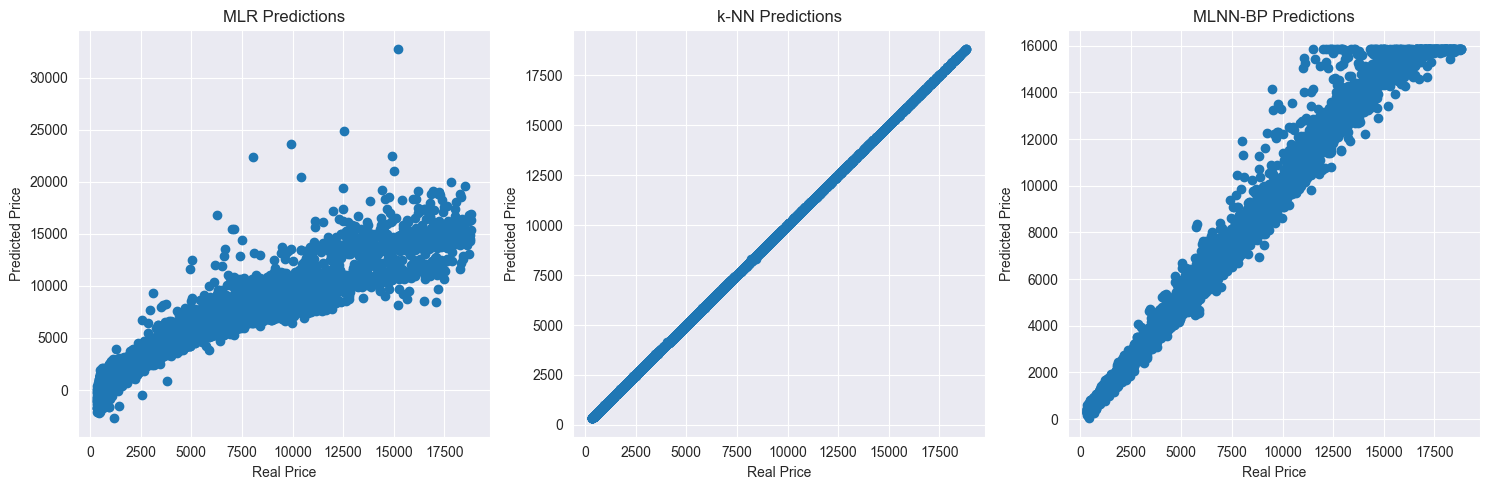

In [35]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error


# Define features and target variable for test data
X_test = test_processed_df[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']]
y_test = test_processed_df['price']

# Define the best models with their best parameters
best_models = {
    'MLR': Pipeline([
        ('scaler', StandardScaler()),
        ('model', LinearRegression(fit_intercept=True, n_jobs=None))
    ]),
    'k-NN': Pipeline([
        ('scaler', StandardScaler()),
        ('model', KNeighborsRegressor(n_neighbors=9, weights='distance'))
    ]),
    'MLNN-BP': Pipeline([
        ('scaler', StandardScaler()),
        ('model', MLPRegressor(activation='tanh', alpha=0.01, hidden_layer_sizes=(50, 50), max_iter=10000, solver='adam'))
    ])
}

# Fit the models on the test data and make predictions
predictions = {}
for model_name in best_models:
    model = best_models[model_name]
    model.fit(X_test, y_test)  # Fit the model on the test data
    predictions[model_name] = model.predict(X_test)  # Make predictions

# Calculate MAPE for each model using real price instead of log_price
mape_results = {}
for model_name in predictions:
    mape_results[model_name] = mean_absolute_percentage_error(y_test, predictions[model_name]) * 100
# Generate a dataframe with the original attributes and the predictions of the three models
results_df = test_processed_df.copy()
results_df['pred_price_mlr'] = predictions['MLR']
results_df['pred_price_knn'] = predictions['k-NN']
results_df['pred_price_bp'] = predictions['MLNN-BP']

# Print MAPE results
print("MAPE results:")
for model_name in mape_results:
    print(f"{model_name}: {mape_results[model_name]}")

# Scatter plots between the real price and its prediction for each model
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(y_test, results_df['pred_price_mlr'])
plt.xlabel('Real Price')
plt.ylabel('Predicted Price')
plt.title('MLR Predictions')

plt.subplot(1, 3, 2)
plt.scatter(y_test, results_df['pred_price_knn'])
plt.xlabel('Real Price')
plt.ylabel('Predicted Price')
plt.title('k-NN Predictions')

plt.subplot(1, 3, 3)
plt.scatter(y_test, results_df['pred_price_bp'])
plt.xlabel('Real Price')
plt.ylabel('Predicted Price')
plt.title('MLNN-BP Predictions')

plt.tight_layout()
plt.show()


### HIGH PRICE



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Define features and target variable
X = train_processed_df[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']]
y = train_processed_df['high_price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models and their hyperparameters for cross-validation
models = {
    'LR': LogisticRegression(max_iter=1000),
    'SVM': SVC(),
    'MLNN-BP': MLPClassifier(max_iter=1000)
}

param_grids = {
    'LR': {
    },
    'SVM': {
    },
    'MLNN-BP': {
        'model__hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'model__alpha': [0.0001, 0.001, 0.01],
        'model__activation': ['identity', 'logistic', 'tanh', 'relu'],
        'model__learning_rate_init': [0.001, 0.01, 0.1],
    }
}

# Perform cross-validation and hyperparameter tuning
best_estimators = {}
for model_name in models:
    print(f"Processing model: {model_name}", flush=True)
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', models[model_name])
    ])
    grid_search = GridSearchCV(pipeline, param_grids[model_name], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_estimators[model_name] = grid_search.best_estimator_
    print(f"Processed model: {model_name}", flush=True)
# Evaluate the models on the test set
results = {}
for model_name in best_estimators:
    model = best_estimators[model_name]
    score = model.score(X_test, y_test)
    results[model_name] = score

print("Model evaluation results:")
for model_name in results:
    print(f"{model_name}: {results[model_name]}")

print("Best parameters for each model:")
for model_name in best_estimators:
    print(f"{model_name}: {best_estimators[model_name].get_params()}")


Processing model: LR
Processed model: LR
Processing model: SVM
